Using TensorFlow backend.


x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_train_images shape: (60000, 28, 28)
x_test_images shape: (10000, 28, 28)


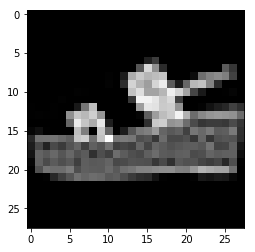

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Note in Colab you can type "pip install" directly in the notebook
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

plt.imshow(x_train[12],cmap="gray")

print("x_train_images shape:", x_train.shape)
print("x_test_images shape:", x_test.shape)

In [4]:
x_train=x_train.reshape(60000, 784)
x_test=x_test.reshape(10000,784)
print("x_train_images shape:", x_train.shape)
print("x_test_images shape:", x_test.shape)

x_train_images shape: (60000, 784)
x_test_images shape: (10000, 784)


In [0]:
from sklearn.preprocessing import normalize

x_train_norm=normalize(x_train, norm='l2', axis=1, copy=True, return_norm=False)
x_test_norm=normalize(x_test, norm='l2', axis=1, copy=True, return_norm=False)

In [0]:
x_train_transp=x_train_norm.transpose()
multmatrius=np.matmul(x_test_norm, x_train_transp)

In [0]:
ranks=np.argsort(multmatrius, axis=-1, kind='quicksort', order=None)

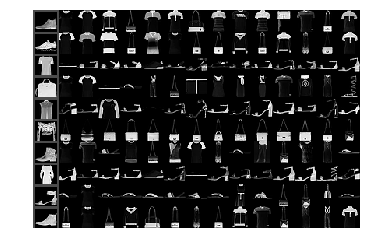

In [8]:
from PIL import Image, ImageOps

# get the original images for visualization
x_train = np.reshape(x_train, (60000, 28, 28))
x_test = np.reshape(x_test, (10000, 28, 28))

h,w = (28, 28)
new_image= Image.new('RGB', (h*15,w*10))

# Visualize ranks of the 10 queries
offset = 900 # it will show results from query #'offset' to #offset+10
for q in range(10):
  ranks_q = ranks[q*(offset+1),:]
  for i in range(15):
      new_image.paste( Image.fromarray(x_train[ranks_q[i]]), (h*(1+i),w*q ))

  # visualize query
  ima_q = Image.fromarray(x_test[q*(offset+1),...])
  ima_q = ImageOps.expand(ima_q, border=3, fill='green')

  new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()
